## Pandas Dataframe Practice

In [1]:
import numpy as np
import pandas as pd


#### A Sample DataFrame

In [2]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 
           'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
history_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                  'math': math_grades,
                  'english': english_grades,
                  'history': history_grades})

type(df)

pandas.core.frame.DataFrame

In [12]:
# as we might expect, the object in df has type DataFrame
# DataFrames also have a nice printed representation, especially
# the html rendering we get in jupyter.
df

,name,math,english,history
0,Sally,62,85,80
1,Jane,88,79,67
2,Suzie,94,74,95
3,Billy,98,96,88
4,Ada,77,92,98
5,John,79,76,93
6,Thomas,82,64,81
7,Marie,93,63,90
8,Albert,92,62,87
9,Richard,69,80,94


#### Summarizing DataFrames
- The `.info()` method prints out some useful info (duh)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   math     12 non-null     int64 
 2   english  12 non-null     int64 
 3   history  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


- The `.describe()` method gives a quick summary of the numerical values of df

In [7]:
df.describe()

,math,english,history
count,12.000000,12.000000,12.000000
mean,84.833333,77.666667,86.500000
std,11.134168,13.371158,9.643651
min,62.000000,62.000000,67.000000
25%,78.500000,63.750000,80.750000
50%,90.000000,77.500000,89.000000
75%,92.250000,86.750000,93.250000
max,98.000000,99.000000,98.000000


<AxesSubplot:ylabel='Frequency'>

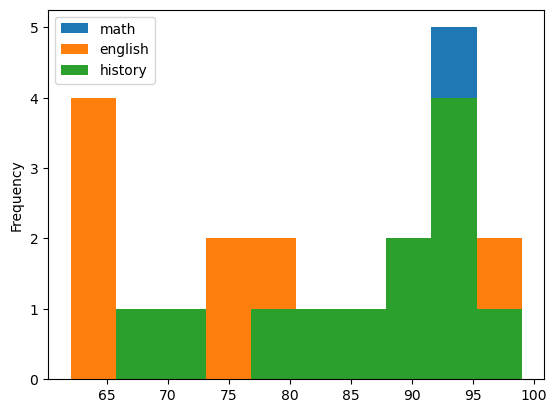

In [13]:
df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

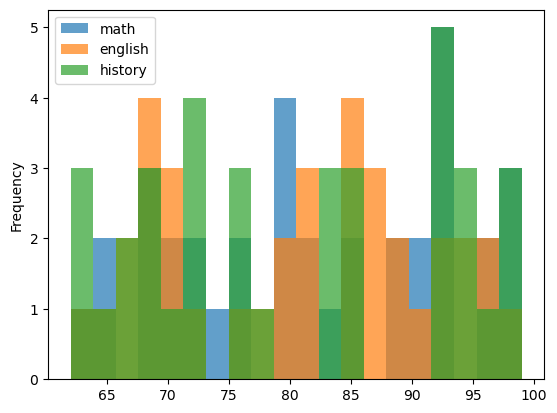

In [25]:
# notice that randint chooses numbers randomly, not from a normal distribution
# the random seed selected should always produce these values for these parameters
# so that the work can be duplicated. Let's change the seed and see what we get.
np.random.seed(9999)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 
           'Marie', 'Albert', 'Richard', 'Isaac', 'Alan', 'Sally', 'Jane',
            'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 'Marie', 'Albert',
            'Richard', 'Isaac', 'Alan', 'Sally', 'Jane', 'Suzie', 'Billy',
            'Ada', 'John', 'Thomas', 'Marie', 'Albert', 'Richard', 'Isaac',
            'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
history_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                  'math': math_grades,
                  'english': english_grades,
                  'history': history_grades})

df.plot.hist(bins=20, alpha=0.7)

<AxesSubplot:ylabel='Frequency'>

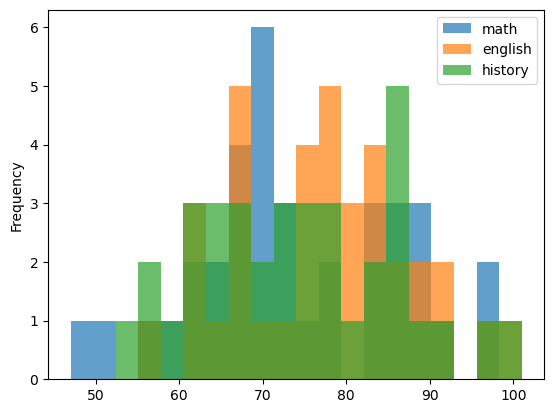

In [23]:
# here let's change the code to produce a normal distribution with mu=75 and sigma=10
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 
           'Marie', 'Albert', 'Richard', 'Isaac', 'Alan', 'Sally', 'Jane',
            'Suzie', 'Billy', 'Ada', 'John', 'Thomas', 'Marie', 'Albert',
            'Richard', 'Isaac', 'Alan', 'Sally', 'Jane', 'Suzie', 'Billy',
            'Ada', 'John', 'Thomas', 'Marie', 'Albert', 'Richard', 'Isaac',
            'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.normal(loc=75.0, scale=10.0, size=len(students))
english_grades = np.random.normal(loc=75.0, scale=10.0, size=len(students))
history_grades = np.random.normal(loc=75.0, scale=10.0, size=len(students))

df = pd.DataFrame({'name': students,
                  'math': math_grades,
                  'english': english_grades,
                  'history': history_grades})

df.plot.hist(bins=20, alpha=0.7)

#### DataFrame Attributes
- `.dtypes`: the data type of each column
- `.shape`: the number of rows, columns in the DataFrame
- `.columns`: the list of column names
- `.index`: the labels for each row (usually an autogenerated number)

In [26]:
df.dtypes, df.shape, df.columns, df.index

(name       object
 math        int64
 english     int64
 history     int64
 dtype: object,
 (36, 4),
 Index(['name', 'math', 'english', 'history'], dtype='object'),
 RangeIndex(start=0, stop=36, step=1))

The `.columns attribute can be assigned to if we want to change the names of the columns.

In [29]:
# here a list comprehension is used to generate a new column name list
# whichis then reassigned to df.columns
df.columns = [col.upper() for col in df.columns]

In [28]:
df.head()

,NAME,MATH,ENGLISH,HISTORY
0,Sally,82,90,96
1,Jane,88,97,99
2,Suzie,97,81,98
3,Billy,85,85,86
4,Ada,98,97,84


In [30]:
# converting back to standard lowercase pythonic names
df.columns = [column.lower() for column in df.columns]

In [31]:
df.head()

,name,math,english,history
0,Sally,82,90,96
1,Jane,88,97,99
2,Suzie,97,81,98
3,Billy,85,85,86
4,Ada,98,97,84


#### Subsetting DataFrames
There are a number of ways we can access subsets of a DataFrame

1. Accessing Multiple Columns

In [33]:
# the following two code samples are functionally equivalent
df[['name', 'math']].head()

,name,math
0,Sally,82
1,Jane,88
2,Suzie,97
3,Billy,85
4,Ada,98


In [35]:
columns = ['name', 'math']
df[columns].head()

,name,math
0,Sally,82
1,Jane,88
2,Suzie,97
3,Billy,85
4,Ada,98


2. Accessing Individual Columns

Each column in a DataFrame is a Series. These values can be accessed in one of two ways.

In [37]:
df.math.head()

0    82
1    88
2    97
3    85
4    98
Name: math, dtype: int64

In [39]:
df['math'].head()

0    82
1    88
2    97
3    85
4    98
Name: math, dtype: int64

In [40]:
# in general the first method (dot notation) is preferred, but the second
# is required if the name of the column is not a valid python identifier

#### Accessing Row Subsets
Pandas provides several convenient methods for quickly looking at several rows in a DataFrame:
    
- `.head`: for the first n(default 5) rows
- `.tail`: for the last n(default 5) rows
- `.sample`: for a random sample of rows

We can also subset DataFrames with a boolean series

In [42]:
(df.math < 80).head()

0    False
1    False
2    False
3    False
4    False
Name: math, dtype: bool

#### Dropping and Renaming Columns
- `.drop()` method with argument columns=[*columns to drop*]
- `.rename()` method with argument columns={*'old_name': 'new_name'*}
- underlying df will not be changed unless reassigned or argument `inplace=True`
- becasue these methods return DataFrames, we can chain them together

In [44]:
df.drop(columns=['english', 'math']).rename(columns={'name': 'student'}).head()

,student,history
0,Sally,96
1,Jane,99
2,Suzie,98
3,Billy,86
4,Ada,84


In [46]:
# underlying df not changed
df.head()

,name,math,english,history
0,Sally,82,90,96
1,Jane,88,97,99
2,Suzie,97,81,98
3,Billy,85,85,86
4,Ada,98,97,84


#### Creating New Columns

We can add new columns to a DataFrame in several ways:

- Most common: create a new column based on transformed contents of existing column
- `.assign()` method
- neither method modifies underlying df unless we reassign

In [49]:
# boolean column
(df.math > 70).head()

0    True
1    True
2    True
3    True
4    True
Name: math, dtype: bool

In [50]:
# to assign it to the we can use the index operator with a new name
df['passing_math'] = df.math > 70

In [51]:
df.head()

,name,math,english,history,passing_math
0,Sally,82,90,96,True
1,Jane,88,97,99,True
2,Suzie,97,81,98,True
3,Billy,85,85,86,True
4,Ada,98,97,84,True


In [53]:
# using .assign
df.assign(passing_english=df.english > 70).head()

,name,math,english,history,passing_math,passing_english
0,Sally,82,90,96,True,True
1,Jane,88,97,99,True,True
2,Suzie,97,81,98,True,True
3,Billy,85,85,86,True,True
4,Ada,98,97,84,True,True


In [54]:
# looking at the underlying df: not changed
df.head()

,name,math,english,history,passing_math
0,Sally,82,90,96,True
1,Jane,88,97,99,True
2,Suzie,97,81,98,True
3,Billy,85,85,86,True
4,Ada,98,97,84,True


#### Sorting DataFrames
We can use the `.sort_values()` method to sort a df by any given criteria. For example, we can sort by the english grade:

In [56]:
df.sort_values(by='english').head()

,name,math,english,history,passing_math
7,Marie,72,63,66,True
33,Richard,90,64,66,True
32,Albert,69,66,95,False
15,Billy,80,66,62,True
20,Albert,64,68,84,False


In [57]:
# to sort them high to low we use keyword arg 'ascending=False'
df.sort_values(by='english', ascending=False).head()

,name,math,english,history,passing_math
8,Albert,93,98,70,True
4,Ada,98,97,84,True
1,Jane,88,97,99,True
35,Alan,79,94,85,True
26,Suzie,90,94,75,True


#### Chaining DataFrame Methods Examples

In [59]:
# find the name of the student with the lowest english grade about a 90.
df[df.english > 90].sort_values(by='english').head(1).name

9    Richard
Name: name, dtype: object

#### Importing DataFrames from PyDataset
- there are 757 sample datasets in a package called pydataset
- the package can be installed with pip
- to see what datasets are available use `pydataset.data()`
- the syntax to load a dataset is below

In [60]:
# import the data command
from pydataset import data

Running this code snippet will show information about the dataset:

`data(df_string_name, show_doc=True)`

Running this code snippet will load the dataset for use as a pandas DataFrame:

`df = data(df_string_name)`

In [67]:
# Load the mpg dataset and store in the 'mpg' variable

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## [Exercises](https://ds.codeup.com/python/dataframes/)

In [68]:
df.head()

,name,math,english,history,passing_math
0,Sally,82,90,96,True
1,Jane,88,97,99,True
2,Suzie,97,81,98,True
3,Billy,85,85,86,True
4,Ada,98,97,84,True


#### 1. Copy the code from the lesson to create a dataframe full of student grades.

a. Create a column named passing_english that indicates whether each student has a passing grade in english.

In [70]:
df['passing_english'] = df.english > 70
df.head()

,name,math,english,history,passing_math,passing_english
0,Sally,82,90,96,True,True
1,Jane,88,97,99,True,True
2,Suzie,97,81,98,True,True
3,Billy,85,85,86,True,True
4,Ada,98,97,84,True,True


b. Sort the english grades by the passing_english column. 
- How are duplicates handled? It's not clear how dupes are handled in this case.

In [77]:
df.sort_values('passing_english')

,name,math,english,history,passing_math,passing_english
17,John,82,70,83,True,False
15,Billy,80,66,62,True,False
14,Suzie,96,70,73,True,False
13,Jane,98,69,69,True,False
18,Thomas,68,69,85,False,False
27,Billy,63,70,73,False,False
7,Marie,72,63,66,True,False
20,Albert,64,68,84,False,False
32,Albert,69,66,95,False,False
33,Richard,90,64,66,True,False


c. Sort the english grades first by passing_english and then by student name. All the students that are failing english should be first, and within the students that are failing english they should be ordered alphabetically. The same should be true for the students passing english. (Hint: you can pass a list to the sort_values method)

In [79]:
df.sort_values(['passing_english', 'name'], ascending = [False, True]).head()

,name,math,english,history,passing_math,passing_english
4,Ada,98,97,84,True,True
16,Ada,72,80,92,True,True
11,Alan,92,85,95,True,True
23,Alan,69,79,75,False,True
35,Alan,79,94,85,True,True


d. Sort the english grades first by passing_english, and then by the actual english grade, similar to how we did in the last step.

In [80]:
df.sort_values(['passing_english', 'english'], ascending = [False, False])

,name,math,english,history,passing_math,passing_english
8,Albert,93,98,70,True,True
1,Jane,88,97,99,True,True
4,Ada,98,97,84,True,True
26,Suzie,90,94,75,True,True
35,Alan,79,94,85,True,True
9,Richard,65,92,73,False,True
34,Isaac,92,92,98,True,True
0,Sally,82,90,96,True,True
6,Thomas,76,89,92,True,True
21,Richard,74,88,64,True,True


e. Calculate each students overall grade and add it as a column on the dataframe. The overall grade is the average of the math, english, and reading grades.

In [84]:
df.dtypes

name                object
math                 int64
english              int64
history              int64
passing_math          bool
passing_english       bool
overall_grade      float64
dtype: object

In [85]:
df['overall_grade'] = df[['math', 'history', 'english']].mean(axis=1)

In [86]:
df.head()

,name,math,english,history,passing_math,passing_english,overall_grade
0,Sally,82,90,96,True,True,89.333333
1,Jane,88,97,99,True,True,94.666667
2,Suzie,97,81,98,True,True,92.000000
3,Billy,85,85,86,True,True,85.333333
4,Ada,98,97,84,True,True,93.000000


#### 2. Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:

- How many rows and columns are there?


In [87]:
df_mpg = data('mpg')

In [93]:
print(f'There are {df.shape[0]} rows.')
print(f'There are {df.shape[1]} columns.')


There are 36 rows.
There are 7 columns.


- What are the data types of each column?


In [94]:
df_mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

- Summarize the dataframe with .info and .describe


In [96]:
df_mpg.info(), df_mpg.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


(None,
             displ         year         cyl         cty         hwy
 count  234.000000   234.000000  234.000000  234.000000  234.000000
 mean     3.471795  2003.500000    5.888889   16.858974   23.440171
 std      1.291959     4.509646    1.611534    4.255946    5.954643
 min      1.600000  1999.000000    4.000000    9.000000   12.000000
 25%      2.400000  1999.000000    4.000000   14.000000   18.000000
 50%      3.300000  2003.500000    6.000000   17.000000   24.000000
 75%      4.600000  2008.000000    8.000000   19.000000   27.000000
 max      7.000000  2008.000000    8.000000   35.000000   44.000000)

- Rename the cty column to city.


In [106]:
df_mpg.rename(columns={'cty': 'city'}, inplace=True)

In [107]:
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Rename the hwy column to highway.


In [109]:
df_mpg.rename(columns={'hwy': 'highway'}, inplace=True)

- Do any cars have better city mileage than highway mileage?


In [112]:
df_mpg[df_mpg.city > df_mpg.highway]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class


In [113]:
df_mpg.city.max(), df_mpg.highway.max()

(35, 44)

- Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.


In [114]:
df_mpg['mileage_difference'] = df_mpg.highway - df_mpg.city

f- Which car (or cars) has the highest mileage difference?


In [123]:
df_mpg[['manufacturer', 'model', 'mileage_difference'
       ]].sort_values(['mileage_difference', 'manufacturer', 'model']
                     , ascending=[False, True, True]).head(5)

,manufacturer,model,mileage_difference
107,honda,civic,12
223,volkswagen,new beetle,12
1,audi,a4,11
3,audi,a4,11
36,chevrolet,malibu,11


- Which compact class car has the lowest highway mileage? The best?


In [131]:
df_mpg[df_mpg['class'] == 'compact'][['manufacturer', 'model', 'highway']].sort_values(['highway', 'manufacturer', 'model']).head()

,manufacturer,model,highway
220,volkswagen,jetta,23
212,volkswagen,gti,24
221,volkswagen,jetta,24
9,audi,a4 quattro,25
12,audi,a4 quattro,25


In [132]:
df_mpg[df_mpg['class'] == 'compact'][['manufacturer', 'model', 'highway']].sort_values(['highway', 'manufacturer', 'model'], ascending=[False, True, True]).head()

,manufacturer,model,highway
213,volkswagen,jetta,44
197,toyota,corolla,37
196,toyota,corolla,35
198,toyota,corolla,35
195,toyota,corolla,33


- Create a column named average_mileage that is the mean of the city and highway mileage.


In [133]:
df_mpg['average_mileage'] = df_mpg[['city', 'highway']].mean(axis=1)

In [134]:
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


- Which dodge car has the best average mileage? The worst?


In [141]:
df_mpg[df_mpg['manufacturer'] == 'dodge'][['model', 'average_mileage']
].sort_values(['average_mileage', 'model'], ascending=[False, True]).head()

,model,average_mileage
38,caravan 2wd,21.0
39,caravan 2wd,20.5
42,caravan 2wd,20.5
43,caravan 2wd,20.5
47,caravan 2wd,19.5


In [142]:
df_mpg[df_mpg['manufacturer'] == 'dodge'][['model', 'average_mileage']
].sort_values(['average_mileage', 'model'], ascending=[True, True]).head()

,model,average_mileage
55,dakota pickup 4wd,10.5
60,durango 4wd,10.5
66,ram 1500 pickup 4wd,10.5
70,ram 1500 pickup 4wd,10.5
57,dakota pickup 4wd,13.0


In [143]:
# nailing it, dodge

#### 3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:



- Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:



In [149]:
mammals = data('Mammals')

In [150]:
mammals.head()

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


- What are the data types?


In [151]:
mammals.dtypes


weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

- Summarize the dataframe with .info and .describe


In [152]:
mammals.info(), mammals.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


(None,
             weight       speed
 count   107.000000  107.000000
 mean    278.688178   46.208411
 std     839.608269   26.716778
 min       0.016000    1.600000
 25%       1.700000   22.500000
 50%      34.000000   48.000000
 75%     142.500000   65.000000
 max    6000.000000  110.000000)

In [162]:
weight_of_max_speed = float(mammals[mammals.speed == mammals.speed.max()]['weight'])
print(f'The weight of the fastest animal is {weight_of_max_speed}.')

The weight of the fastest animal is 55.0.


- What is the overall percentage of specials?


In [167]:
percent_specials = round(((len(mammals[mammals.specials == True])
                    / mammals.shape[0]) * 100), 2)
print(f'The overall percentage of specials is {percent_specials}%.')

The overall percentage of specials is 9.35%.


- How many animals are hoppers that are above the median speed? What percentage is this?


In [182]:
hoppers_above_med_speed = len(mammals[(mammals['hoppers'] == True) &
(mammals['speed'] > mammals['speed'].median())])
print(f'There are {hoppers_above_med_speed} hoppers above the median speed.')
print(f'That is {hoppers_above_med_speed/len(mammals):.2%} \
of the total mammals in the sample.')

There are 7 hoppers above the median speed.
That is 6.54% of the total mammals in the sample.
